<a href="https://colab.research.google.com/github/gmarambaia/gmarambaia/blob/main/Capstone_Coursera_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model<p>
Regression Tree Model <p>
Neural Network Model<p>

Evaluation and selection of the Model

To compare their performance I will use **R-squared and RMS Error**. `loss` will be the dependent variable and all other variables except `loan_amnt`, `total_pymnt`, and `loan_status` will work as explanatory variables.

In [1]:
# importing the libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('df_predictions.csv')
df.head()

loan_amnt  int_rate  installment  annual_inc  revol_bal  revol_util  \
0       8000      6.68       245.85     41000.0      24377        51.0   
1      12175      9.17       388.13    100000.0      21329        64.6   
2       6400      6.92       197.38     41900.0      14936        73.2   
3      12600      6.68       387.22     73800.0       9904        20.7   
4       9000      8.67       284.82     82000.0      46158        77.1   

   total_acc  acc_open_past_24mths   total_pymnt  loan_status_bin  \
0         29                     2   8351.630000                0   
1         17                     3  13205.910000                0   
2         15                     1   3550.380000                1   
3         25                     4  13125.770000                0   
4         29                     2   9789.870001                0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
0                        0                   0                    1   
1                        1                   0                    0   
2                        0                   0                    1   
3                        0                   1                    0   
4                        1                   0                    0   

   verification_status_Not Verified  verification_status_Source Verified  \
0                                 1                                    0   
1                                 1                                    0   
2                                 0                                    1   
3                                 1                                    0   
4                                 0                                    0   

   verification_status_Verified  
0                             0  
1                             0  
2                             0  
3                             0  
4                             1

Lenders would also like to predict the amount of losses. Even if a loan is bad, they can recover some of the money they lent.<p>

For this part of the project, I'll need to consider loans that have `loan_status` **Charged Off**. 

In order to do it, will be necessary to create a new column called `loss`, which is the difference between `loan_amnt` and `total_pymnt`.<p>

Again the dataset will be splitted in training and validation sets using a 60:40 split.<p>

In the first part of this project we attributed binary values to the varible loan_status. The status Charged Off = 1 and Fully Paid = 0. So the first thing we gonna do is drop all entries with fully paid status.

In [3]:
df['loan_status_bin'].value_counts()

0    5401
1    1077
Name: loan_status_bin, dtype: int64

We will work with only 1,077 entries. Ok let's do it.

In [4]:
#dropping entries with Fully Paid status
df.drop(df[df.loan_status_bin == 0].index, inplace=True)

In [5]:
df['loan_status_bin'].value_counts()

1    1077
Name: loan_status_bin, dtype: int64

Now, let's create our new varibale called `loss`

In [6]:
#creating the variable 'loss'
df["loss"] = (df["loan_amnt"] - df["total_pymnt"])
df.head()

loan_amnt  int_rate  installment  annual_inc  revol_bal  revol_util  \
2        6400      6.92       197.38     41900.0      14936        73.2   
6        6000      7.89       187.72     43000.0       3102        50.9   
8       10000     10.99       327.34     36000.0       9022        67.8   
11      16000     18.25       580.45     65000.0      15460        58.8   
16      12000     17.57       431.25     60000.0      16084        76.5   

    total_acc  acc_open_past_24mths  total_pymnt  loan_status_bin  \
2          15                     1      3550.38                1   
6          20                     3      1701.25                1   
8          49                     4      3594.63                1   
11         17                     6      8662.40                1   
16         14                     4      6850.96                1   

    home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_RENT  \
2                         0                   0                    1   
6                         0                   0                    1   
8                         0                   0                    1   
11                        0                   0                    1   
16                        0                   0                    1   

    verification_status_Not Verified  verification_status_Source Verified  \
2                                  0                                    1   
6                                  0                                    1   
8                                  0                                    1   
11                                 1                                    0   
16                                 0                                    1   

    verification_status_Verified     loss  
2                              0  2849.62  
6                              0  4298.75  
8                              0  6405.37  
11                             0  7337.60  
16                             0  5149.04

In [7]:
#dropping 'loan_amnt', 'total_pymnt' and 'loan_status_bin'
df.drop(['loan_amnt', 'total_pymnt', 'loan_status_bin'], axis=1, inplace = True)
df.head()

int_rate  installment  annual_inc  revol_bal  revol_util  total_acc  \
2       6.92       197.38     41900.0      14936        73.2         15   
6       7.89       187.72     43000.0       3102        50.9         20   
8      10.99       327.34     36000.0       9022        67.8         49   
11     18.25       580.45     65000.0      15460        58.8         17   
16     17.57       431.25     60000.0      16084        76.5         14   

    acc_open_past_24mths  home_ownership_MORTGAGE  home_ownership_OWN  \
2                      1                        0                   0   
6                      3                        0                   0   
8                      4                        0                   0   
11                     6                        0                   0   
16                     4                        0                   0   

    home_ownership_RENT  verification_status_Not Verified  \
2                     1                                 0   
6                     1                                 0   
8                     1                                 0   
11                    1                                 1   
16                    1                                 0   

    verification_status_Source Verified  verification_status_Verified     loss  
2                                     1                             0  2849.62  
6                                     1                             0  4298.75  
8                                     1                             0  6405.37  
11                                    0                             0  7337.60  
16                                    1                             0  5149.04

#**Linear Regression Model**

Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.<p>

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.<p>

In our case we gonna work with **multiple** linear regression because we have more than one independent (explanatory) variables.

In [8]:
#importing regression libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:
#creating the training and validation set using 60:40
df_train, df_test = train_test_split(df, test_size=0.6, random_state=42, shuffle=True)

# Set independent and dependent variables
X_train = df_train.loc[:, df_train.columns != 'loss']
y_train = df_train.loc[:, df_train.columns == 'loss']
X_test = df_test.loc[:, df_test.columns != 'loss']
y_test = df_test.loc[:, df_test.columns == 'loss']

In [10]:
#importing the model
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model = regr.fit(X_train, y_train)

#y_pred = model.predict(X_test)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: [1573.35179987]
Coefficients: [[-1.04034265e+02  1.92597772e+01  6.61757659e-03  1.25526612e-03
   9.85176524e-01 -1.02907944e+01 -2.07546059e+01 -7.10192054e+01
   5.94095598e+01  1.16096456e+01  4.84515615e+01 -7.99135906e+01
   3.14620291e+01]]


Let’s breakdown what each of those number means:

The **intercept** value is the estimated average value of our dependent variable when all of our independent variables values is 0. In our case this means that in the case we have all our variables on zero, the **loos will be 1,573.35**.
For the **coefficients** we have 13 values for the all our variables. This value represents the relation of our independent variable to the dependent variable, where a change of exactly 1 at the independent variable will change the value of our dependent variable the same amount as the coefficient.

##**Model Validation**
After building the model it is important for us to validate it’s performance. We can evaluate a model by looking at it’s **coefficient of determination (R²), F-test, t-test, and also residuals**.<p>

**Before we continue** we will rebuild our model using the statsmodel library with the OLS() function. Then we will print the model summary using the summary() function on the model. The model summary contains lots of important value we can use to evaluate our model.

In [11]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

X_train = sm.add_constant(X_train) # adding a constant
olsmod = sm.OLS(y_train, X_train).fit()

y_pred = olsmod.predict(sm.add_constant(X_test))

print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                   loss   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     284.1
Date:                Sun, 21 Aug 2022   Prob (F-statistic):          3.16e-186
Time:                        10:03:26   Log-Likelihood:                -3836.8
No. Observations:                 430   AIC:                             7698.
Df Residuals:                     418   BIC:                             7746.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

**Coefficient of Determination (R²)**
<p>
Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable. 

In [12]:
print('R2 score:', round(olsmod.rsquared,2))
print('R2 score %:', round((olsmod.rsquared*100),2),'%')

R2 score: 0.88
R2 score %: 88.2 %


R² range between 0 and 1, where R²=0 means there are no linear relationship between the variables and R²=1 shows a perfect linear relationship.<p>
<p>
In our case, we got R² score about 0.88 which means 88.2% of our dependent variable can be explained using our independent variables.

**F-Test (ANOVA)**<p>
F-test or ANOVA (Analysis of variance) in multi-linear regression can be used to determine whether our complex model perform better than a simpler model (e.g. model with only one independent variable). <p>
With F-test we can evaluate the significance of our model by calculating the probability of observing an F-statistic that is at least as high as the value that our model obtained. Similar to R² score, we can easily get the F-statistic and probability of said F-statistic by accessing the .fvalues and .f_pvalues attribute of our model as below.

In [13]:
print('F-statistic:', round(olsmod.fvalue,2))
print('Probability of observing value at least as high as F-statistic:', round((olsmod.f_pvalue),2))

F-statistic: 284.13
Probability of observing value at least as high as F-statistic: 0.0


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

**T-test**<p>
The t-statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. <p>
It can be thought of as a measure of the precision with which the regression coefficient is measured. Same as the F-test, the p-value show the probability of seeing a result as extreme as the one our model have. We can also get the p-value for all of our variables by calling the .pvalues attribute on the model.

In [14]:
print(round(olsmod.pvalues,2))

const                                  0.00
int_rate                               0.00
installment                            0.00
annual_inc                             0.12
revol_bal                              0.75
revol_util                             0.84
total_acc                              0.31
acc_open_past_24mths                   0.60
home_ownership_MORTGAGE                0.22
home_ownership_OWN                     0.12
home_ownership_RENT                    0.04
verification_status_Not Verified       0.02
verification_status_Source Verified    0.17
verification_status_Verified           0.06
dtype: float64


We can see that `annual_inc`, `revol_bal`, `revol_util`, `total_acc`, `acc_open_past_24mths`, `home_owenership_MORTAGE`, `home_owenership_OWN`, `verification_status_Verified` and `verification_status_Source Verified` have *p-values* grater than 0.05. So, 9 of 13 variables have no effect was in the dependent variable `loss` <p>
`int_rate`, `installment`, `home_ownership_RENT` and `verification_status_Not Verified` have *p-values* less than 0.5 which shows that those variables has effects effects in `loss`.

**Assumption Testing**<p>
Next, we will validate our model by doing residual analysis, below are the list of test or assumption we will do to check on our model validity:

* Linearity
* Normality
* Multicollinearity
* Autocorrelation
* Homoscedasticity

**Residual** is the difference between the observed value and predicted value from our dataset. <p>
With statsmodel we can easily get the residual value of our model by simply accesing the .resid attribute of the model and then we can keep it in a new column called 'residual' in our dataframe.

In [15]:
df_train['loss_pred'] = olsmod.predict(X_train)
df_train['residual'] = olsmod.resid
df_train.head()

int_rate  installment  annual_inc  revol_bal  revol_util  total_acc  \
2744     11.53       494.86     38300.0      12943        60.8         33   
6421     11.53       395.89     55000.0       9849        28.8         27   
1913     18.25       317.44     23076.0      11754        75.8         24   
2109      9.76       289.40     50000.0      18254        52.6         44   
6303     12.69       354.74     50000.0      34991        72.0         16   

      acc_open_past_24mths  home_ownership_MORTGAGE  home_ownership_OWN  \
2744                     4                        0                   0   
6421                     9                        0                   0   
1913                     3                        0                   0   
2109                     7                        0                   0   
6303                     7                        0                   0   

      home_ownership_RENT  verification_status_Not Verified  \
2744                    1                                 0   
6421                    1                                 1   
1913                    1                                 0   
2109                    1                                 1   
6303                    1                                 0   

      verification_status_Source Verified  verification_status_Verified  \
2744                                    0                             1   
6421                                    0                             0   
1913                                    0                             1   
2109                                    0                             0   
6303                                    1                             0   

          loss    loss_pred     residual  
2744  11002.69  9854.785929  1147.904071  
6421  10820.02  7998.711136  2821.308864  
1913   5671.98  5764.516904   -92.536904  
2109   8141.56  5999.353650  2142.206350  
6303   6175.54  7152.865999  -977.325999

**Linearity**<p>
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

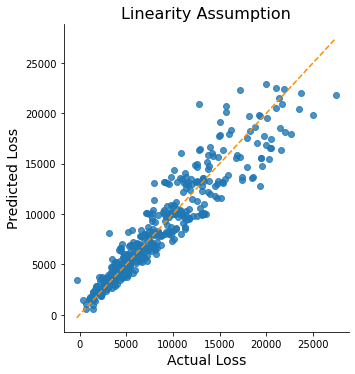

In [16]:
# Plotting the observed vs predicted values
sns.lmplot(x='loss', y='loss_pred', data=df_train, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_train[['loss', 'loss_pred']].min().min()-10, 
                        df_train[['loss', 'loss_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Loss', fontsize=14)
plt.xlabel('Actual Loss', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point evenly spread around the diagonal line, so we can assume that there is linear relationship between our independent and dependent variables.

**Normality** <p>
This assumes that the error terms of the model are normally distributed. We will examine the *normality* of the residuals by plotting it into histogram and looking at the *p-value* from the Anderson-Darling test for normality. We will use the *normal_ad()* function from *statsmodel* to calculate our *p-value* and then compare it to threshold of 0.05, **if the p-value we get is higher than the threshold then we can assume that our residual is normally distributed**.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


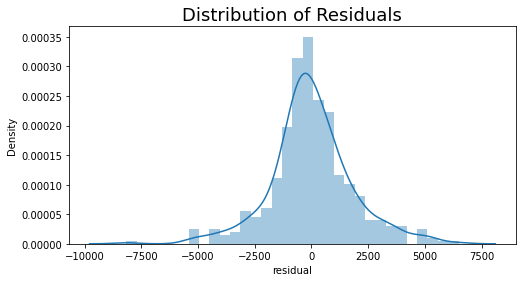

Residuals are not normally distributed


In [17]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_train['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', round(p_value,2))

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_train['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Jarque-Bera test ---- statistic: 65.2100, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9700, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5400, p-value: 0.0000
Anderson-Darling test ---- statistic: 4.9000, 5% critical value: 0.7800
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


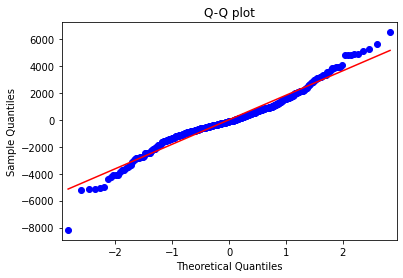

In [18]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(olsmod.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(olsmod.resid)
    sw = stats.shapiro(olsmod.resid)
    ad = stats.anderson(olsmod.resid, dist='norm')
    ks = stats.kstest(olsmod.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {round(jb[0],2):.4f}, p-value: {round(jb[1],2)}')
    print(f'Shapiro-Wilk test ---- statistic: {round(sw[0],2):.4f}, p-value: {round(sw[1],2):.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {round(ks.statistic,2):.4f}, p-value: {round(ks.pvalue,2):.4f}')
    print(f'Anderson-Darling test ---- statistic: {round(ad.statistic,2):.4f}, 5% critical value: {round(ad.critical_values[2],2):.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(regr)

**Conclusion: non-normal distribution**<p>
You have several options for handling your non normal data. Many tests, including the one sample Z test, T test and ANOVA assume normality. <p>
We can can also choose to transform the data with a function, forcing it to fit a normal model. 

However, when we a sample that is skewed or one that naturally fits another distribution type, we may want to run a non parametric test.<p>

A non parametric test is one that doesn’t assume the data fits a specific distribution type. Non parametric tests include the Wilcoxon signed rank test, the Mann-Whitney U Test and the Kruskal-Wallis test.

**Finding our distribution type**<p>
Let’s use the fitter library fitter to identify the distribution of our dataset.<p>
One important thing to note is that the Fitter library has a *get_common_distribution( )* method which includes 10 common distributions. This could come in handy when you don’t have any idea about the distributions that might fit your data.

In [19]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 2.5 MB/s 
  Created wheel for fitter: filename=fitter-1.4.1-py3-none-any.whl size=25220 sha256=72f1793b5e544bfcb6ea5d3e6924342e2597717e307300436096513322ee1aea
  Stored in directory: /root/.cache/pip/wheels/38/ee/21/98ef5c3186a1f3e8747aa54cf9610fda8876ea82e06c670400
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=16795e9aab40b25d160438a79b5b1a01e152010e187017af5a07a2b9a2d769f7
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


The fitted distributions summary will provide top-five distributions that fit the data well. Based on the sumsquared_error criteria the best-fitted distribution is the cauchy distribution.

sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy       1.214178e-07  2118.216824 -9442.632236     inf      0.049791   
rayleigh     1.649283e-07          inf -9310.934831     inf      0.121099   
lognorm      2.152845e-07  2267.610454 -9190.297619     inf      0.081189   
gamma        2.169736e-07  2260.909741 -9186.936959     inf      0.079133   
norm         2.176427e-07  2253.366939 -9191.676910     inf      0.077720   

          ks_pvalue  
cauchy     0.229073  
rayleigh   0.000006  
lognorm    0.006504  
gamma      0.008654  
norm       0.010485

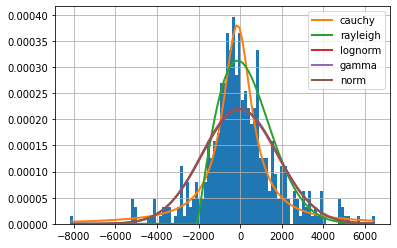

In [20]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(df_train['residual'],
           distributions= get_common_distributions())
f.fit()
f.summary()

**Multicollinearity**<p>
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data using the corr() function from Pandas dataframe. Then we can display it as a heatmap using heatmap() function from Seaborn.

In [21]:
# creating the correlation matrix
corr = df_train[['int_rate', 'installment', 'annual_inc', 'revol_bal', 'revol_util', 'total_acc', 'acc_open_past_24mths', 'home_ownership_MORTGAGE',
           'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'loss']].corr()

display(corr);

int_rate  installment  annual_inc  \
int_rate                             1.000000     0.029029   -0.248487   
installment                          0.029029     1.000000    0.514026   
annual_inc                          -0.248487     0.514026    1.000000   
revol_bal                           -0.017137     0.344982    0.372969   
revol_util                           0.116201     0.167801    0.227489   
total_acc                           -0.170924     0.229757    0.398259   
acc_open_past_24mths                 0.185309    -0.003280    0.167344   
home_ownership_MORTGAGE             -0.108517     0.244996    0.347237   
home_ownership_OWN                   0.096605     0.044434   -0.073685   
home_ownership_RENT                  0.044230    -0.259153   -0.284381   
verification_status_Not Verified    -0.212176    -0.200986   -0.044754   
verification_status_Source Verified -0.003963     0.106388    0.049516   
verification_status_Verified         0.205957     0.080708   -0.008851   
loss                                -0.045294     0.935602    0.517764   

                                     revol_bal  revol_util  total_acc  \
int_rate                             -0.017137    0.116201  -0.170924   
installment                           0.344982    0.167801   0.229757   
annual_inc                            0.372969    0.227489   0.398259   
revol_bal                             1.000000    0.225847   0.219981   
revol_util                            0.225847    1.000000  -0.036973   
total_acc                             0.219981   -0.036973   1.000000   
acc_open_past_24mths                 -0.046238   -0.288961   0.405617   
home_ownership_MORTGAGE               0.231595    0.061353   0.344368   
home_ownership_OWN                   -0.020774   -0.083684  -0.029547   
home_ownership_RENT                  -0.206887   -0.007371  -0.308443   
verification_status_Not Verified      0.001834   -0.147932  -0.020546   
verification_status_Source Verified  -0.022043    0.110818  -0.056571   
verification_status_Verified          0.021148    0.025637   0.078297   
loss                                  0.334908    0.163137   0.211609   

                                     acc_open_past_24mths  \
int_rate                                         0.185309   
installment                                     -0.003280   
annual_inc                                       0.167344   
revol_bal                                       -0.046238   
revol_util                                      -0.288961   
total_acc                                        0.405617   
acc_open_past_24mths                             1.000000   
home_ownership_MORTGAGE                          0.112806   
home_ownership_OWN                               0.032067   
home_ownership_RENT                             -0.126368   
verification_status_Not Verified                -0.069408   
verification_status_Source Verified             -0.039471   
verification_status_Verified                     0.107019   
loss                                            -0.030601   

                                     home_ownership_MORTGAGE  \
int_rate                                           -0.108517   
installment                                         0.244996   
annual_inc                                          0.347237   
revol_bal                                           0.231595   
revol_util                                          0.061353   
total_acc                                           0.344368   
acc_open_past_24mths                                0.112806   
home_ownership_MORTGAGE                             1.000000   
home_ownership_OWN                                 -0.231603   
home_ownership_RENT                                -0.807213   
verification_status_Not Verified                    0.002838   
verification_status_Source Verified                -0.051042   
verification_status_Verified                        0.050310   
loss              

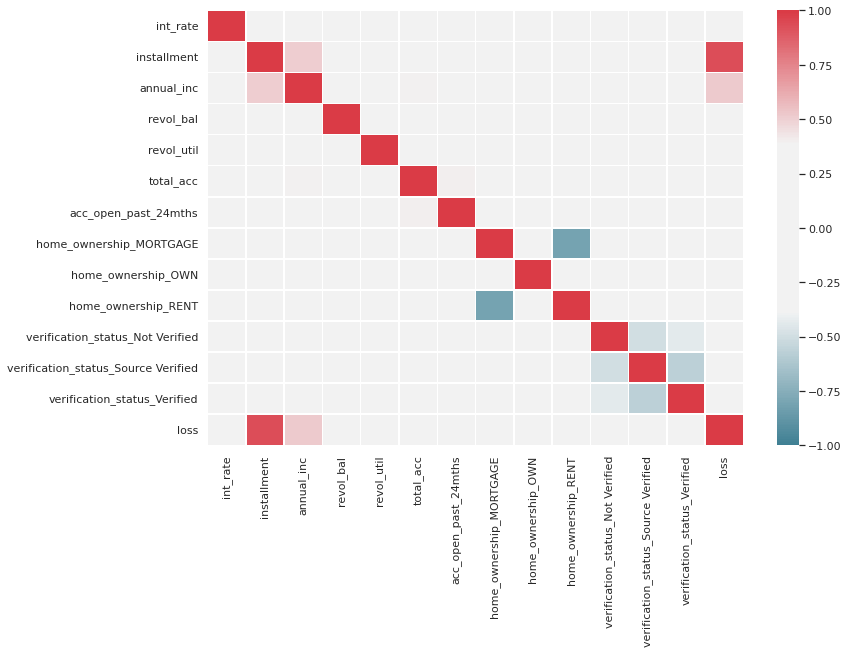

In [22]:
# creating the heatmap for the correlation matrix
sns.set(rc = {'figure.figsize':(12,8)})
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5);

The image shows that there are some strong relationship between `installment` and `loss` and also a positive relationship between `loss` and `annual_inc`.<p>
We can see that we also have some positive and negative relationships between some of our independent variables, that means that there's some multicollinearity in our data.

**Calculate the VIF value**<p>
Variance Inflation Factor (VIF) is a number that determines whether a variable has multicollinearity or not. That number also represents how much a variable is inflated because of the linear dependence with other variables.<p>

In Python, we can calculate the VIF using a function called *variance_inflation_factor* from the *statsmodels* library.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_info['Column'] = X_train.columns
vif_info.sort_values('VIF', ascending=False)

VIF                               Column
8        inf              home_ownership_MORTGAGE
9        inf                   home_ownership_OWN
10       inf                  home_ownership_RENT
11       inf     verification_status_Not Verified
12       inf  verification_status_Source Verified
13       inf         verification_status_Verified
3   1.999030                           annual_inc
7   1.628583                 acc_open_past_24mths
2   1.585835                          installment
6   1.568603                            total_acc
1   1.423169                             int_rate
5   1.353157                           revol_util
4   1.285388                            revol_bal
0   0.000000                                const

The VIF value starts from 1, and it has no upper limit. If the number gets larger, it means the variable has huge multicollinearity on it.<p>

VIF <= 2.5 is acceptable. In our case we have 7 variables with VIF <= 2.5, which means that is totally acceptable to work with those variables<p>

An infinite value of VIF for a given independent variable indicates that it can be perfectly predicted by other variables in the model. In our case all the dummies got infinite value for VIF, which means that we can exclude them for our model without suffer any problems in our projections.<p>

I'll keep them for now.

**Autocorrelation**<p>
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing *Durbin-Watson* test to determine if either positive or negative correlation is present. In this step we will use the *durbin_watson* () function from *statsmodel* to calculate our **Durbin-Watson score** and then assess the value with the following condition:<p>

* If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied
* If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied
* If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [24]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = round(durbin_watson(df_train['residual']),2)

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.85
Little to no autocorrelation 

Assumption satisfied


Our model got a Durbin-Watson score of about 1.85 which is between 1.5 and 2.5, so we can assume that **there is no autocorrelation in our residual**.

**Homoscedasticity**<p>
When residuals do not have constant variance (they exhibit heteroscedasticity), it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. For example, if the variance of the residuals is increasing over time, confidence intervals for out-of-sample predictions will be unrealistically narrow. Another effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients — the subset in which the error variance was largest.<p>
To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.<p>
We can also use two statistical tests: *Breusch-Pagan* and *Goldfeld-Quandt*. In both of them, the null hypothesis assumes *homoscedasticity* and a *p-value* below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.


 Breusch-Pagan test ----
                                value
Lagrange multiplier statistic  119.44
p-value                          0.00
f-value                         14.62
f p-value                        0.00

 Goldfeld-Quandt test ----
             value
F statistic   1.40
p-value       0.01

 Residuals plots ----


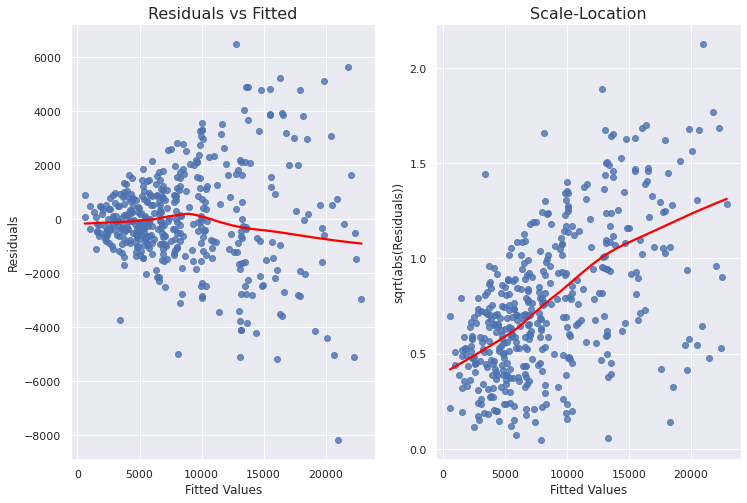

In [25]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = olsmod.predict(X_train)
    resids = olsmod.resid
    resids_standardized = olsmod.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, olsmod.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, olsmod.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(round(bp_test,2))
    print('\n Goldfeld-Quandt test ----')
    print(round(gq_test,2))
    print('\n Residuals plots ----')

homoscedasticity_test(regr)

The results indicate that the assumption is not satisfied and we should reject the hypothesis of homoscedasticity.<p>

**Potential solutions:**

* log transformation of the dependent variable
* in case of time series, deflating a series if it concerns monetary value
* using ARCH (auto-regressive conditional heteroscedasticity) models to model the error variance. An example might be stock market, where data can exhibit periods of increased or decreased volatility over time (volatility clustering, see this article for more information)

In this specific case we will use log transformation.

In [26]:
# Set independent and dependent variables
X = df.loc[:, df.columns != 'loss']
y = df.loc[:, df.columns == 'loss']

#creating the training and validation set using 60:40
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.6, random_state=42, shuffle=True)

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model = regr.fit(X_train, y_train)

y_pred = model.predict(X_test)

* ***Mean Squared Error (MSE) -*** There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
* ***Root Mean Squared Error (RMSE) -*** RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function.

In [27]:
#evaluating the model
import math
MSE = mean_squared_error(y_test, y_pred)
print("MSE:\t\t", round(mean_absolute_error(y_test, y_pred),2))
print("RMSE:\t\t", round(math.sqrt(MSE),2))

MSE:		 1362.68
RMSE:		 1902.78


##**Multiple Linear Regression Conclusions**<p>
**Comparison numbers**
* Coefficient of Determination (R²) - In our case, we got R² score about 0.88 which means 88.2% of our dependent variable can be explained using our independent variables.
* We also have MSE and RMSE (we will use those numbers with to R² evaluate the model)

**Assumption results**

* Linearity - The inspection of the plots shows that the linearity assumption is satisfied. **(passed)**
* Normality - From the results above we can infer that the residuals do not follow Gaussian distribution, we also know that is a cauchy distribution **(rejected)**
* Multicollinearity - There's multicolinearity on the data, but it is not revelant for now. I don't want to remove variables from the dataframe, so We may use PCA to reduce features to a smaller set of uncorrelated components or not.
* Autocorrelation - there is no autocorrelation in our residual **(passed)**
* Homoscedasticity - there's no homoscedasticity.<p>
Relevant conclusions of our database are that we may need to improve the model to get better results either normalizing the data using *MinMax Scaler()* for example, or applying log to our dependent variable `loss` in order to maximize the results of our model.

#**Regression Tree Model**

A regression tree is built through a process known as binary recursive partitioning, which is an iterative process that splits the data into partitions or branches, and then continues splitting each partition into smaller groups as the method moves up each branch.<p>
Regression trees are a nonparametric regression method that creates a binary tree by recursively splitting the data on the predictor values. The splits are selected so that the two child nodes have smaller variability around their average value than the parent node.<p>
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.<p>
Discrete output example: A weather prediction model that predicts whether or not there’ll be rain on a particular day. 
Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.

In [28]:
df.head()

int_rate  installment  annual_inc  revol_bal  revol_util  total_acc  \
2       6.92       197.38     41900.0      14936        73.2         15   
6       7.89       187.72     43000.0       3102        50.9         20   
8      10.99       327.34     36000.0       9022        67.8         49   
11     18.25       580.45     65000.0      15460        58.8         17   
16     17.57       431.25     60000.0      16084        76.5         14   

    acc_open_past_24mths  home_ownership_MORTGAGE  home_ownership_OWN  \
2                      1                        0                   0   
6                      3                        0                   0   
8                      4                        0                   0   
11                     6                        0                   0   
16                     4                        0                   0   

    home_ownership_RENT  verification_status_Not Verified  \
2                     1                                 0   
6                     1                                 0   
8                     1                                 0   
11                    1                                 1   
16                    1                                 0   

    verification_status_Source Verified  verification_status_Verified     loss  
2                                     1                             0  2849.62  
6                                     1                             0  4298.75  
8                                     1                             0  6405.37  
11                                    0                             0  7337.60  
16                                    1                             0  5149.04

In [29]:
# Set independent and dependent variables
X = df.loc[:, df.columns != 'loss']
y = df.loc[:, df.columns == 'loss']

#creating the training and validation set using 60:40
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.6, random_state=42, shuffle=True)

In [30]:
#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor

In [31]:
#Parametrize the model
#We will use the mean squered error == varince as spliting criteria and set the minimum number

dtree = DecisionTreeRegressor(criterion="squared_error",min_samples_leaf=2) 

In [32]:
#Fit the model
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)

#Predict unseen query instances
y_pred = dtree.predict(X_test)

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,24), dpi=600)
plot_tree(dtree.fit(X_train, y_train), feature_names=X.columns);

In [34]:
#Compute and plot the RMSE

MSE = mean_squared_error(y_test, y_pred)
r2 = dtree.score(X_test,y_test)
leaves = dtree.get_n_leaves()
depth = dtree.get_depth()

print('The depth of the decision tree is ', (depth))
print('The decrision tree has ', (leaves), 'leaves')
print("MSE:\t\t", round(mean_squared_error(y_test, y_pred),2))
print("RMSE:\t\t", round(math.sqrt(MSE),2))
print('R2 score:\t', round((r2*100),2),'%')

The depth of the decision tree is  18
The decrision tree has  430 leaves
MSE:		 6650708.8
RMSE:		 2578.9
R2 score:	 77.04 %


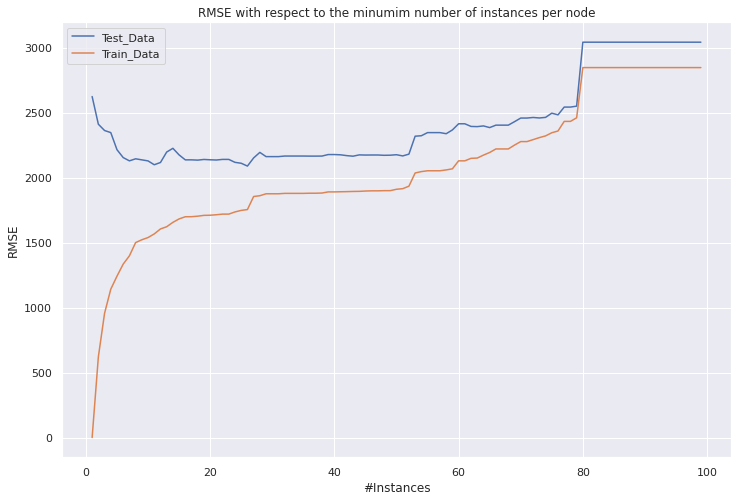

In [35]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_train = []
RMSE_test = []

for i in range(1,100):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    dtree = DecisionTreeRegressor(criterion="squared_error",min_samples_leaf=i)   
    #Train the model
    dtree.fit(X_train, y_train)
    #Predict query instances
    y_pred_train = dtree.predict(X_train)
    y_pred_test = dtree.predict(X_test)
    #Calculate and append the RMSEs
    RMSE_train.append(math.sqrt(mean_squared_error(y_train, y_pred_train)))
    RMSE_test.append(math.sqrt(mean_squared_error(y_test, y_pred_test)))

ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

In [36]:
# Calculating the mean absolute error 
mae_train = mean_absolute_error(y_train, y_pred_train).round(2)
mae_test = mean_absolute_error(y_test, y_pred_test).round(2)

print(f"Mean absolute error on training set: {mae_train}")
print(f"Mean absolute error on test set: {mae_test}")

Mean absolute error on training set: 2067.69
Mean absolute error on test set: 2106.91


In [37]:
# Saving the feature names 
features = X.columns.tolist()

# Extracting the importances 
importances = dtree.feature_importances_

# Creating a dataframe with the feature importance
feature_importance = {}
for i, feature in enumerate(features):
    feature_importance[feature] = round(importances[i], 3)

feature_importance

{'int_rate': 0.0,
 'installment': 1.0,
 'annual_inc': 0.0,
 'revol_bal': 0.0,
 'revol_util': 0.0,
 'total_acc': 0.0,
 'acc_open_past_24mths': 0.0,
 'home_ownership_MORTGAGE': 0.0,
 'home_ownership_OWN': 0.0,
 'home_ownership_RENT': 0.0,
 'verification_status_Not Verified': 0.0,
 'verification_status_Source Verified': 0.0,
 'verification_status_Verified': 0.0}

##**Decision Tree Regression Conclusions**<p>
**Comparison numbers**
* Coefficient of Determination (R²) - In our case, we got R² score about 0.77 which means 77% of our dependent variable can be explained using our independent variables.
* We also have MSE and RMSE (we will use those numbers with to R² evaluate the model)

Our decision tree has a depth of 18 and 430 leaves (nodes).<p>
The most important feature of our decision tree is `installment`

#**Neural Network Model**
Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms<p>
Artificial neural networks, usually simply called neural networks or neural nets, are computing systems inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain

In [99]:
df.head()

int_rate  installment  annual_inc  revol_bal  revol_util  total_acc  \
2       6.92       197.38     41900.0      14936        73.2         15   
6       7.89       187.72     43000.0       3102        50.9         20   
8      10.99       327.34     36000.0       9022        67.8         49   
11     18.25       580.45     65000.0      15460        58.8         17   
16     17.57       431.25     60000.0      16084        76.5         14   

    acc_open_past_24mths  home_ownership_MORTGAGE  home_ownership_OWN  \
2                      1                        0                   0   
6                      3                        0                   0   
8                      4                        0                   0   
11                     6                        0                   0   
16                     4                        0                   0   

    home_ownership_RENT  verification_status_Not Verified  \
2                     1                                 0   
6                     1                                 0   
8                     1                                 0   
11                    1                                 1   
16                    1                                 0   

    verification_status_Source Verified  verification_status_Verified     loss  
2                                     1                             0  2849.62  
6                                     1                             0  4298.75  
8                                     1                             0  6405.37  
11                                    0                             0  7337.60  
16                                    1                             0  5149.04

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 2 to 6457
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   int_rate                             1077 non-null   float64
 1   installment                          1077 non-null   float64
 2   annual_inc                           1077 non-null   float64
 3   revol_bal                            1077 non-null   int64  
 4   revol_util                           1077 non-null   float64
 5   total_acc                            1077 non-null   int64  
 6   acc_open_past_24mths                 1077 non-null   int64  
 7   home_ownership_MORTGAGE              1077 non-null   int64  
 8   home_ownership_OWN                   1077 non-null   int64  
 9   home_ownership_RENT                  1077 non-null   int64  
 10  verification_status_Not Verified     1077 non-null   int64  
 11  verification_status_Source Ver

Here we will need to do some different things than the other predictions.
We gonna need to do standardization of data, if we don't do it, the ANN is not gonna work (well, it's gonna work but the results will be very wrong).<p>

The previous models COULD be improved to got better results, for ANN we MUST do something with the data in order to proper evaluate the model, it would be pointless run the model without standardization just to conclude that we need to do it to improve the results because we are already aware that without it the results will be very bad.<p>
If you want to insist to run the model without do standardization, go ahead, and when you finish, you can run again doing it.

In [101]:
# Set independent and dependent variables
X = df.loc[:, df.columns != 'loss'].values
y = df.loc[:, df.columns == 'loss'].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

#creating the training and validation set using 60:40
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.6, random_state=42, shuffle=True)


# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(430, 13)
(430, 1)
(647, 13)
(647, 1)


In [102]:
# Installing required libraries
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In the below code snippet, the *Sequential* module from the Keras library is used to create a sequence of ANN layers stacked one after the other. Each layer is defined using the *Dense module* of Keras where we specify how many neurons would be there, which technique would be used to initialize the weights in the network. what will be the activation function for each neuron in that layer etc

In [103]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
ann = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
ann.add(Dense(units=5, input_dim=13, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
ann.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
ann.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
ann.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
ann.fit(X_train, y_train, batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
22/22 [==============================] - 0s 2ms/step - loss: 0.9772
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.9718
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.9578
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.9224
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.8534
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.7443
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.6243
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.5291
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4538
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3967
Epoch 11/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3437
Epoch 12/50
22/22 [==============================] - 0s 2ms/step - loss: 0.2989
Epoch 13/50
22/22 [==============================

**Hyperparameter tuning of ANN**<p>
Finding the best values for *batch_size* and *epoch* is very important as it directly affects the model performance. Bad values can lead to overfitting or underfitting. I am showing two approaches for tuning the parameters of the ANN. Apart from epoch and batch_size, you can also choose to tune the optimal number of neurons, the optimal number of layers, etc.<p>

There is no thumb rule which can help you to decide the number of layers/number of neurons etc. in the first look at data. You need to try different parameters and choose the combination which produces the highest accuracy.<p>

Just keep in mind, that, the bigger the network, the more computationally intensive it is, hence it will take more time to run. So always to find the best accuracy with the minimum number of layers/neurons.

**Finding best set of parameters using manual grid search**<p>
This is a simple for loop based approach. You can easily edit this and adapt it for more hyperparameters by simply adding another nested for-loop.

In [104]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            ann = Sequential()
            # Defining the first layer of the model
            ann.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            ann.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            ann.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            ann.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            ann.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-ann.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 133.41635300705852
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 180.49554197948163
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 191.69428859901012
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 176.19359697870678
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 135.64282643285662
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 168.1548710276864
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 171.1759017518325
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 177.81365861289487
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 116.46859690337614
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 153.27998163435876
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 132.58066806124822
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 133.2576953868763
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 126.17141269553912
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 77.36442645602733
15 Paramet

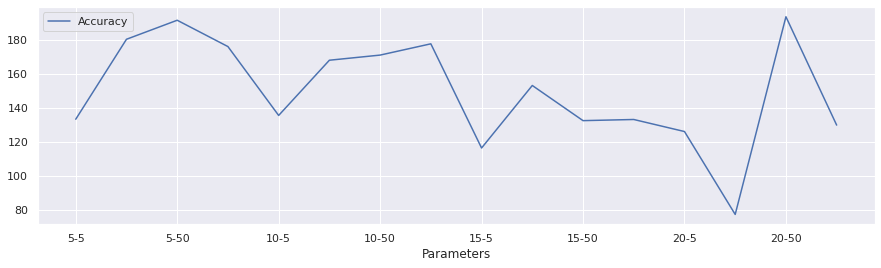

In [105]:
#plotting the parameter trial results
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line');

**Visualizing the results of parameter trials for ANN**<p>
This graph shows that the best set of parameters are *batch_size=5* and *epochs=10*. Next step is to train the model with these parameters.

**Training the ANN model with the best parameters**<p>
Using the best set of parameters found above, training the model again and predicting the loss on testing data.

In [106]:
# Fitting the ANN to the Training set
ann.fit(X_train, y_train, batch_size = 20, epochs = 50, verbose=0)

In [107]:
# Generating Predictions on testing data
y_pred=ann.predict(X_test)

# Scaling the predicted Price data back to original price scale
y_pred=TargetVarScalerFit.inverse_transform(y_pred)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
X_test_orig=PredictorScalerFit.inverse_transform(X_test)

loss = y_test_orig
predicted_loss = y_pred

X = df.loc[:, df.columns != 'loss']
X_train, X_test = train_test_split(X, test_size=0.6, random_state=42, shuffle=True)

TestingData = X_test.copy()
TestingData = TestingData.assign(loss=loss,predicted_loss=predicted_loss)
TestingData.head()

int_rate  installment  annual_inc  revol_bal  revol_util  total_acc  \
2615      7.89       219.00     30000.0       1929        42.9         17   
3374      8.19       263.97     42000.0       6316        42.7         12   
5782      9.99       271.01     65000.0      17620        66.5         29   
3566     15.61       310.32     23378.0       9526        81.4         32   
5004      8.18       188.52     61000.0       5195        76.4         20   

      acc_open_past_24mths  home_ownership_MORTGAGE  home_ownership_OWN  \
2615                     2                        0                   0   
3374                     2                        0                   0   
5782                     8                        0                   0   
3566                     7                        0                   0   
5004                     3                        0                   0   

      home_ownership_RENT  verification_status_Not Verified  \
2615                    1                                 0   
3374                    1                                 1   
5782                    1                                 0   
3566                    1                                 0   
5004                    1                                 0   

      verification_status_Source Verified  verification_status_Verified  \
2615                                    1                             0   
3374                                    0                             0   
5782                                    0                             1   
3566                                    0                             1   
5004                                    1                             0   

         loss  predicted_loss  
2615  4813.07     4464.812988  
3374  5338.42     6142.448730  
5782  5225.27     5944.288086  
3566  6710.46     6220.507324  
5004  5060.13     4210.451172

**Finding the accuracy of the model**<p>
Using the final trained model, now we are generating the prediction error for each row in testing data as the Absolute Percentage Error. Taking the average for all the rows is known as Mean Absolute Percentage Error(MAPE).

In [108]:
# Computing the absolute percent error
APE=100*(abs(TestingData['loss']-TestingData['predicted_loss'])/TestingData['loss'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 82.51181333844494


int_rate  installment  annual_inc  revol_bal  revol_util  total_acc  \
2615      7.89       219.00     30000.0       1929        42.9         17   
3374      8.19       263.97     42000.0       6316        42.7         12   
5782      9.99       271.01     65000.0      17620        66.5         29   
3566     15.61       310.32     23378.0       9526        81.4         32   
5004      8.18       188.52     61000.0       5195        76.4         20   

      acc_open_past_24mths  home_ownership_MORTGAGE  home_ownership_OWN  \
2615                     2                        0                   0   
3374                     2                        0                   0   
5782                     8                        0                   0   
3566                     7                        0                   0   
5004                     3                        0                   0   

      home_ownership_RENT  verification_status_Not Verified  \
2615                    1                                 0   
3374                    1                                 1   
5782                    1                                 0   
3566                    1                                 0   
5004                    1                                 0   

      verification_status_Source Verified  verification_status_Verified  \
2615                                    1                             0   
3374                                    0                             0   
5782                                    0                             1   
3566                                    0                             1   
5004                                    1                             0   

         loss  predicted_loss        APE  
2615  4813.07     4464.812988   7.235652  
3374  5338.42     6142.448730  15.061174  
5782  5225.27     5944.288086  13.760401  
3566  6710.46     6220.507324   7.301328  
5004  5060.13     4210.451172  16.791640

In [111]:
residual = TestingData['loss']-TestingData['predicted_loss']
TestingData['residual']=residual
TestingData.head()

int_rate  installment  annual_inc  revol_bal  revol_util  total_acc  \
2615      7.89       219.00     30000.0       1929        42.9         17   
3374      8.19       263.97     42000.0       6316        42.7         12   
5782      9.99       271.01     65000.0      17620        66.5         29   
3566     15.61       310.32     23378.0       9526        81.4         32   
5004      8.18       188.52     61000.0       5195        76.4         20   

      acc_open_past_24mths  home_ownership_MORTGAGE  home_ownership_OWN  \
2615                     2                        0                   0   
3374                     2                        0                   0   
5782                     8                        0                   0   
3566                     7                        0                   0   
5004                     3                        0                   0   

      home_ownership_RENT  verification_status_Not Verified  \
2615                    1                                 0   
3374                    1                                 1   
5782                    1                                 0   
3566                    1                                 0   
5004                    1                                 0   

      verification_status_Source Verified  verification_status_Verified  \
2615                                    1                             0   
3374                                    0                             0   
5782                                    0                             1   
3566                                    0                             1   
5004                                    1                             0   

         loss  predicted_loss        APE    residual  
2615  4813.07     4464.812988   7.235652  348.257012  
3374  5338.42     6142.448730  15.061174 -804.028730  
5782  5225.27     5944.288086  13.760401 -719.018086  
3566  6710.46     6220.507324   7.301328  489.952676  
5004  5060.13     4210.451172  16.791640  849.678828

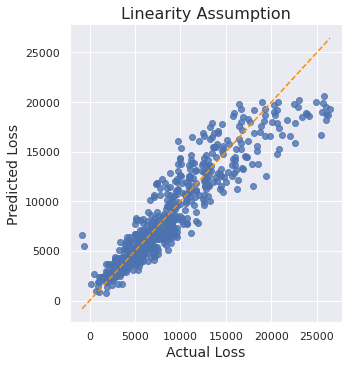

In [119]:
# Plotting the observed vs predicted values
sns.lmplot(x='loss', y='predicted_loss', data=TestingData, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(TestingData[['loss', 'predicted_loss']].min().min()-10, 
                        TestingData[['loss', 'predicted_loss']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Loss', fontsize=14)
plt.xlabel('Actual Loss', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


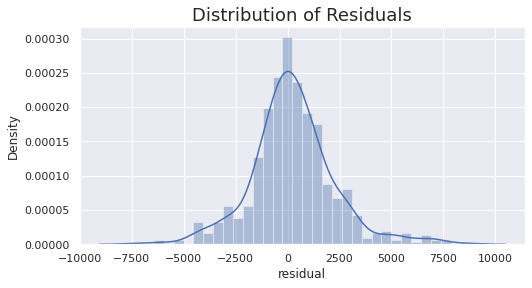

Residuals are not normally distributed


In [120]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(TestingData['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', round(p_value,2))

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(TestingData['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

In [116]:
MSE = mean_squared_error(y_test, y_pred)
y = TestingData['loss']
f = TestingData['predicted_loss']
r2 = r2_score(y, f)

print("MSE:\t\t", round(mean_squared_error(y_test, y_pred),2))
print("RMSE:\t\t", round(math.sqrt(MSE),2))
print('R2 score:\t', round((r2*100),2),'%')

MSE:		 92028780.87
RMSE:		 9593.16
R2 score:	 85.55 %


##**Neural Network Conclusions**<p>
**Comparison numbers**
* Coefficient of Determination (R²) - In our case, we got R² score about 0.86 which means 85.6% of our dependent variable can be explained using our independent variables.
* We also have MSE and RMSE (we will use those numbers with to R² evaluate the model)
* The accuracy of the model is 82.5% - Accuracy refers to how close a measurement is to the true or accepted value.

There's linearity on our data, but as we already know we don't have normality. THe residuals don't have normal distribution.